<a href="https://colab.research.google.com/github/MariaGabrielaAlvesZuppardo/SeriesTemporaisCin/blob/main/Lista_de_Exercicio_Random_Walk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Downloading the database and installing the necessary libraries

In [8]:
!pip install yfinance

In [2]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller


In [9]:
ticket = "BTC-USD"
dados = yf.download(ticket,start="2007-08-18",end="2025-08-18")
dados_weekly= dados['Close'].resample('M').last().dropna()

[*********************100%***********************]  1 of 1 completed
<ipython-input-9-df30d25ffb55>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dados_weekly= dados['Close'].resample('M').last().dropna()


In [10]:
print(type(dados_weekly))  # Deve ser <class 'pandas.core.series.Series'>

<class 'pandas.core.frame.DataFrame'>


### Random Walk com ruído

In [11]:
np.random.seed(42)
random_walk = np.cumsum(np.random.normal(0, 100, len(dados_weekly)))

In [12]:
# Criando DataFrame para armazenar os dados
dados_rw = pd.DataFrame({
    'Close': dados_weekly.values.squeeze(),  # Convertendo para 1D
    'Random Walk': random_walk
}, index=dados_weekly.index)
dados_rw['Close RW'] = dados_rw['Close'] + dados_rw['Random Walk']

### Métricas de Avaliação

In [13]:
media_rw = np.mean(dados_rw['Random Walk'])
desvio_padrao_rw = np.std(dados_rw['Random Walk'])
print(f"Média do Random Walk: {media_rw:.2f}")
print(f"Desvio Padrão do Random Walk: {desvio_padrao_rw:.2f}")

Média do Random Walk: -734.46
Desvio Padrão do Random Walk: 453.00


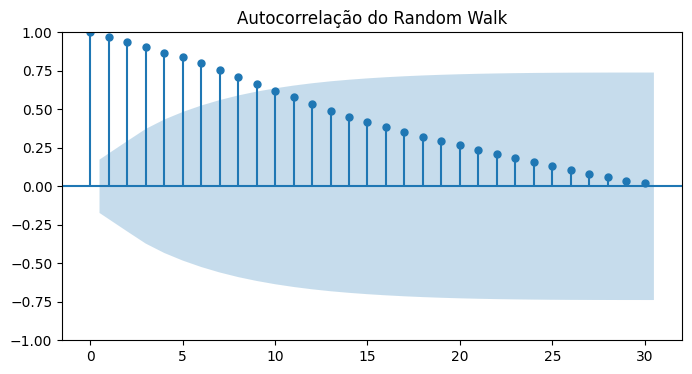

In [14]:
fig, ax = plt.subplots(figsize=(8, 4))
sm.graphics.tsa.plot_acf(dados_rw['Random Walk'], lags=30, ax=ax)
plt.title("Autocorrelação do Random Walk")
plt.show()

### Teste de Dickey-Fuller (Estacionariedade)

In [15]:
adf_teste = adfuller(dados_rw['Random Walk'])
print("\n🔹 Teste de Dickey-Fuller Aumentado (ADF)")
print(f"Estatística de Teste: {adf_teste[0]:.4f}")
print(f"p-valor: {adf_teste[1]:.4f}")

if adf_teste[1] > 0.05:
    print("❌ O Random Walk NÃO é estacionário (possui tendência).")
else:
    print("✅ O Random Walk é estacionário.")



🔹 Teste de Dickey-Fuller Aumentado (ADF)
Estatística de Teste: -1.8089
p-valor: 0.3760
❌ O Random Walk NÃO é estacionário (possui tendência).


### Gráficos

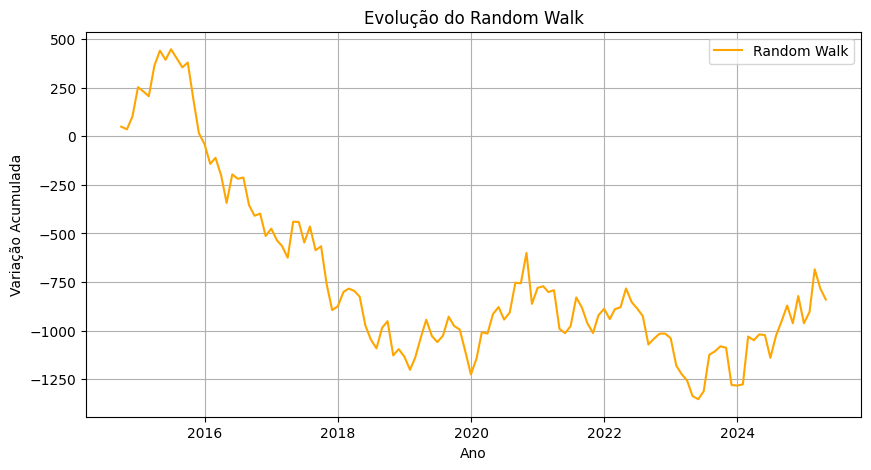

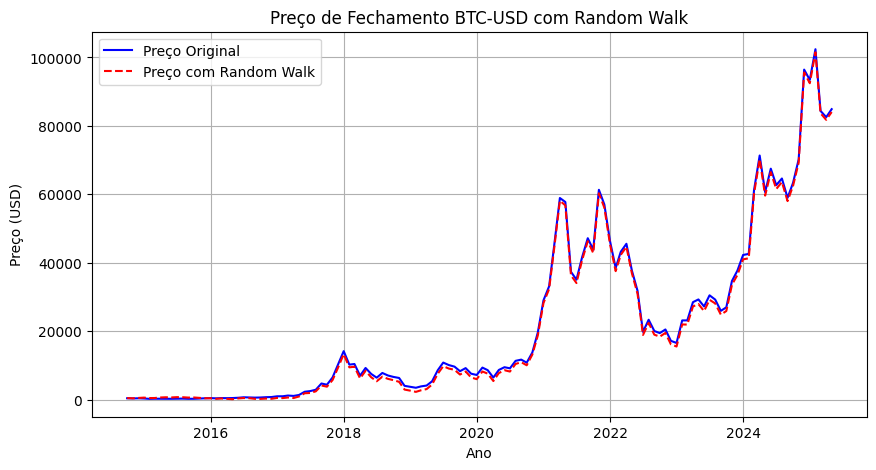

In [16]:
# 1️⃣ Evolução do Random Walk
plt.figure(figsize=(10, 5))
plt.plot(dados_rw.index, dados_rw['Random Walk'], label="Random Walk", color='orange')
plt.title("Evolução do Random Walk")
plt.xlabel("Ano")
plt.ylabel("Variação Acumulada")
plt.legend()
plt.grid()
plt.show()

# 2️⃣ Preço de Fechamento Original vs. Random Walk Aplicado
plt.figure(figsize=(10, 5))
plt.plot(dados_rw.index, dados_rw['Close'], label="Preço Original", color='blue')
plt.plot(dados_rw.index, dados_rw['Close RW'], label="Preço com Random Walk", color='red', linestyle='dashed')
plt.title("Preço de Fechamento BTC-USD com Random Walk")
plt.xlabel("Ano")
plt.ylabel("Preço (USD)")
plt.legend()
plt.grid()
plt.show()

In [17]:
# Plotar os preços reais do Bitcoin e a simulação do Random Walk
plt.figure(figsize=(12, 6))
plt.plot(bitcoin_close, label='Preços Reais do Bitcoin')
plt.plot(random_walk + bitcoin_close.mean(), label='Simulação do Random Walk', alpha=0.7)
plt.title('Preços do Bitcoin vs. Simulação do Random Walk')
plt.xlabel('Data')
plt.ylabel('Preço')
plt.legend()
plt.show()


NameError: name 'bitcoin_close' is not defined

<Figure size 1200x600 with 0 Axes>